![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Pesquisa Operacional

## Anexo com calculos
- Aluno: Lucas Mateus Fernandes
- RA:0035411



---
### Importação de bibliotecas 

In [ ]:
#instalação pulp
!pip3 install pulp
!pip3 install matplot

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
%matplotlib inline

In [2]:
import matplotlib        as mpl
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])

def plot_raizes(list_obj, list_par = None, xlabel=None, ylabel=None):
    if(list_par == None):
        aran = np.arange(0,len(list_obj),1)
    else:
        aran = list_par.copy()

    plt.rcParams["figure.figsize"] = (10,8)
    plt.scatter(aran, list_obj, c=aran, cmap=cmap)

    if(xlabel == None and ylabel == None):
        cbar = plt.colorbar()
        cbar.set_label('Função Objetivo')

    plt.xlabel('Valores parâmetro' if xlabel == None else xlabel)
    plt.ylabel('Função Objetivo' if ylabel == None else ylabel)

    plt.grid()
    plt.show()

In [3]:
def trunc(string):
    return int(str(string).split('.')[0])

---
### Definição de Macros

In [4]:
def custoGaveta(c1, c2, c3):
    return c1 + c2 * c3

def custoPorta(c1, c2, c3):
    return c1 + c2 * c3

def custoModulo(c1,c2,c3,c4):
    return c1 * c2 + c3 * c4

def lucroUnitario(c1,c2):
    return c1 * c2

---
### Definição de Constantes

In [164]:
valorMdf = 230
valorPuxadorGaveta = 15
valorPuxadorPorta = 30
qtdMdf_Gaveta = 1/12
qtdMdf_Porta = 1/3
per_lucroPorta = 0.8
per_lucroGaveta = 0.9

In [165]:
#Custo
c_Porta = custoPorta(valorPuxadorPorta,valorMdf,qtdMdf_Porta)
c_Gaveta = custoGaveta(valorPuxadorGaveta, valorMdf,qtdMdf_Gaveta)
custoModulo_2 = 2*c_Gaveta
custoModulo_3 = 3*c_Gaveta
custoModulo_4 = 4*c_Gaveta
custoModuloPorta = c_Porta

#Lucro
lucroGaveta = lucroUnitario(c_Porta,per_lucroPorta)
lucroPorta = lucroUnitario(c_Gaveta,per_lucroGaveta)

In [166]:
print("Percentual de lucro por porta\t\t\t",str(per_lucroPorta*100)+"%")
print("Percentual de lucro por gaveta\t\t\t",str(per_lucroGaveta*100)+"%")
print("Valor mdf\t\t\t\t\t","R$"+str(valorMdf))
print("Valor puxador gaveta\t\t\t\t","R$"+str(valorPuxadorGaveta))
print("Valor puxador porta\t\t\t\t","R$"+str(valorPuxadorPorta))
print("Percetual de uma peça de mdf gasto por gaveta\t",str(qtdMdf_Gaveta*100)+"%")
print("Percetual de uma peça de mdf gasto por porta\t",str(qtdMdf_Porta*100)+"%")
print("Custo unitario porta\t\t\t\t","R$"+str(c_Porta))
print("Custo unitario gaveta\t\t\t\t","R$"+str(c_Gaveta))
print("Custo modulo 2 gavetas\t\t\t\t","R$"+str(custoModulo_2))
print("Custo modulo 3 gavetas\t\t\t\t","R$"+str(custoModulo_3))
print("Custo modulo 4 gavetas\t\t\t\t","R$"+str(custoModulo_4))
print("Custo modulo porta\t\t\t\t","R$"+str(custoModuloPorta))
print("Lucro por gaveta\t\t\t\t","R$"+str(lucroGaveta))
print("Lucro por porta\t\t\t\t\t","R$"+str(lucroPorta))


Percentual de lucro por porta			 80.0%
Percentual de lucro por gaveta			 90.0%
Valor mdf					 R$230
Valor puxador gaveta				 R$15
Valor puxador porta				 R$30
Percetual de uma peça de mdf gasto por gaveta	 8.333333333333332%
Percetual de uma peça de mdf gasto por porta	 33.33333333333333%
Custo unitario porta				 R$106.66666666666666
Custo unitario gaveta				 R$34.166666666666664
Custo modulo 2 gavetas				 R$68.33333333333333
Custo modulo 3 gavetas				 R$102.5
Custo modulo 4 gavetas				 R$136.66666666666666
Custo modulo porta				 R$106.66666666666666
Lucro por gaveta				 R$85.33333333333333
Lucro por porta					 R$30.75


##### Variavel Basica
* x1 = quantidade de modulo com 2 Gavetas 
* x2 = quantidade de modulo com 3 Gavetas 
* x3 = quantidade de modulo com 4 Gavetas 
* x4 = quantidade de modulo com  1 porta
* x5 = quantidade de funcionarios

##### Função Objetiva

$$ max z = (29,68*x1)+(57,02*x2)+(84,36*x3)+(71,01*x4)-(1345*x5) $$

##### sujeito a:
$$ 0.2*x5 <= 0.50 $$
$$ (x1+2*x2+3*x3+x4)*(1+(0.2*x5)) <= 240 $$
$$ 68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 5000 $$
$$ x1+x2+x3-x4 = 0 $$

In [167]:
def funcObj(x1,x2,x3,x4,x5):
    print("Lucro Adaptado R$"+str(29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5))
    print("--------------------------------")

def simplex(x5):
    ##################################################
    #                  Modelagem
    ##################################################

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    
    auxT = 1-(0.2*x5)

    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 240.0, "tempo_Adaptada")
    r_Material = (68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 5000, "material")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5

    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()

    #status da execução
    print(model.name +" tem a solução",LpStatus[model.status])
    print("Lucro R$%.2f"%model.objective.value())
    
    listVar = []
    #variáveis
    for var in model.variables():
        listVar.append(trunc(var.value()))
        print(var.name, "=", var.value())
    
    funcObj(listVar[0],listVar[1],listVar[2],listVar[3],x5)
    
    #restrições
    #print()
    #for name, constraint in model.constraints.items():
    #    print(name, "=", constraint.value())

simplex(0)
simplex(1)
simplex(2)
simplex(3)

Caso_x5_=_0 tem a solução Optimal
Lucro R$3192.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$3107.4
--------------------------------
Caso_x5_=_1 tem a solução Optimal
Lucro R$1842.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$1757.4
--------------------------------
Caso_x5_=_2 tem a solução Optimal
Lucro R$492.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$407.4000000000001
--------------------------------
Caso_x5_=_3 tem a solução Optimal
Lucro R$-857.68
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$-942.5999999999999
--------------------------------


In [168]:
def funcObj(x1,x2,x3,x4,x5):
    print("Lucro Adaptado R$"+str(29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -250*x5))
    print("--------------------------------")

def simplex(x5):
    ##################################################
    #                  Modelagem
    ##################################################

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    
    auxT = 1-(0.2*x5)

    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 240.0, "tempo_Adaptada")
    r_Material = (68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 5000, "material")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -250*x5

    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()

    #status da execução
    print(model.name +" tem a solução",LpStatus[model.status])
    print("Lucro R$%.2f"%model.objective.value())
    
    listVar = []
    #variáveis
    for var in model.variables():
        listVar.append(trunc(var.value()))
        print(var.name, "=", var.value())
    
    funcObj(listVar[0],listVar[1],listVar[2],listVar[3],x5)
    
    #restrições
    #print()
    #for name, constraint in model.constraints.items():
    #    print(name, "=", constraint.value())

simplex(0)
simplex(1)
simplex(2)
simplex(3)

Caso_x5_=_0 tem a solução Optimal
Lucro R$3192.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$3107.4
--------------------------------
Caso_x5_=_1 tem a solução Optimal
Lucro R$2942.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$2857.4
--------------------------------
Caso_x5_=_2 tem a solução Optimal
Lucro R$2692.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$2607.4
--------------------------------
Caso_x5_=_3 tem a solução Optimal
Lucro R$2442.32
x1 = 0.0
x2 = 0.0
x3 = 20.546538
x4 = 20.546538
Lucro Adaptado R$2357.4
--------------------------------


In [169]:
def funcObj(x1,x2,x3,x4,x5):
    print("Lucro Adaptado R$"+str((54.68*x1 + 82.02*x2 + 109.36*x3 + 96.01*x4 -1350*x5)))
    print("--------------------------------")

def simplex(x5):
    ##################################################
    #                  Modelagem
    ##################################################

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    
    auxT = 1-(0.2*x5)

    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 240.0, "tempo_Adaptada")
    r_Material = (68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 5000, "material")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 54.68*x1 + 82.02*x2 + 109.36*x3 + 96.01*x4 -1350*x5

    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()

    #status da execução
    print(model.name +" tem a solução",LpStatus[model.status])
    print("Lucro R$%.2f"%model.objective.value())
    
    listVar = []
    #variáveis
    for var in model.variables():
        listVar.append(trunc(var.value()))
        print(var.name, "=", var.value())
    
    funcObj(listVar[0],listVar[1],listVar[2],listVar[3],x5)
    
    #restrições
    #print()
    #for name, constraint in model.constraints.items():
    #    print(name, "=", constraint.value())

simplex(0)
simplex(1)
simplex(2)
simplex(3)

Caso_x5_=_0 tem a solução Optimal
Lucro R$4305.18
x1 = 28.569796
x2 = 0.0
x3 = 0.0
x4 = 28.569796
Lucro Adaptado R$4219.32
--------------------------------
Caso_x5_=_1 tem a solução Optimal
Lucro R$2955.18
x1 = 28.569796
x2 = 0.0
x3 = 0.0
x4 = 28.569796
Lucro Adaptado R$2869.3199999999997
--------------------------------
Caso_x5_=_2 tem a solução Optimal
Lucro R$1605.18
x1 = 28.569796
x2 = 0.0
x3 = 0.0
x4 = 28.569796
Lucro Adaptado R$1519.3199999999997
--------------------------------
Caso_x5_=_3 tem a solução Optimal
Lucro R$255.18
x1 = 28.569796
x2 = 0.0
x3 = 0.0
x4 = 28.569796
Lucro Adaptado R$169.3199999999997
--------------------------------


In [170]:
def simplex(x5,perLu,vetor):
    ##################################################
    #                  Modelagem
    ##################################################
    
    lucroP = lucroUnitario(c_Porta,perLu)
    novaConstante = lucroP-25

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    auxT = 1-(0.2*x5)
    
    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 240.0, "tempo_Adaptada")
    r_Material = (68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 5000, "material")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 29.68*x1 + 57.02*x2 + 84.36*x3 + novaConstante*x4 -1350*x5
    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()
    
    ##################################################
    #     Armazenamento para a analise de dados 
    ##################################################
    #Valores a serem armazenados para depois ser plotado
    vetor[0].append(x4.value())
    vetor[1].append(perLu)
    
#Valores a serem armazenados para depois ser plotado
vetores = [[],[]]
vetorPer = []

for i in range(0,1001,1):
    perLu =1+i/100
    vetorPer.append(perLu)
    simplex(0,perLu,vetores)

#Descobre em qual porcentual teve a alteração do padrão
for i in range(1,len(vetores[0])):
    if vetores[0][i] > vetores[0][i-1]:
        print(vetores[1][i])

1.27


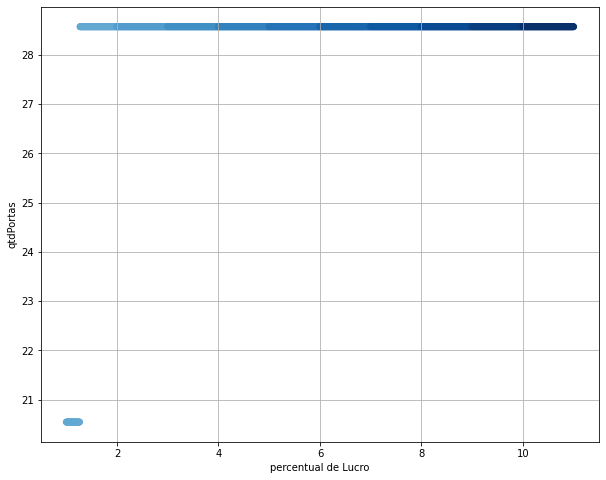

In [171]:
plot_raizes(vetores[0], list_par = vetores[1], xlabel="percentual de Lucro", ylabel="qtdPortas")

In [179]:
def funcObj(x1,x2,x3,x4,x5):
    print("Lucro Adaptado R$"+str(29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5))
    print("--------------------------------")

def simplex(x5):
    ##################################################
    #                  Modelagem
    ##################################################

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    
    auxT = 1-(0.2*x5)

    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 240.0, "tempo_Adaptada")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    #model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5

    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()

    #status da execução
    print(model.name +" tem a solução",LpStatus[model.status])
    print("Lucro R$%.2f"%model.objective.value())
    
    listVar = []
    #variáveis
    for var in model.variables():
        listVar.append(trunc(var.value()))
        print(var.name, "=", var.value())
    
    funcObj(listVar[0],listVar[1],listVar[2],listVar[3],x5)
    
simplex(0)
simplex(1)
simplex(2)
simplex(3)

Caso_x5_=_0 tem a solução Optimal
Lucro R$12082.80
x1 = 120.0
x2 = 0.0
x3 = 0.0
x4 = 120.0
Lucro Adaptado R$12082.800000000001
--------------------------------
Caso_x5_=_1 tem a solução Optimal
Lucro R$13753.50
x1 = 150.0
x2 = 0.0
x3 = 0.0
x4 = 150.0
Lucro Adaptado R$13753.5
--------------------------------
Caso_x5_=_2 tem a solução Optimal
Lucro R$17438.00
x1 = 200.0
x2 = 0.0
x3 = 0.0
x4 = 200.0
Lucro Adaptado R$17438.0
--------------------------------
Caso_x5_=_3 tem a solução Optimal
Lucro R$26157.00
x1 = 300.0
x2 = 0.0
x3 = 0.0
x4 = 300.0
Lucro Adaptado R$26157.0
--------------------------------


In [184]:
def funcObj(x1,x2,x3,x4,x5):
    print("Lucro Adaptado R$"+str(29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5))
    print("--------------------------------")

def simplex(x5):
    ##################################################
    #                  Modelagem
    ##################################################

    #inicia um problema de programação linear (LP)
    model = LpProblem(name="Caso_x5_=_"+str(x5), sense=LpMaximize)

    # inicializa as variáveis de decisão
    x1 = LpVariable(name="x1", lowBound=0)
    x2 = LpVariable(name="x2", lowBound=0)
    x3 = LpVariable(name="x3", lowBound=0)
    x4 = LpVariable(name="x4", lowBound=0)
    
    auxT = ((1-(0.2*x5))*0.5)
    # Cria as regras
    r_Tempo = (0.2*x5 <= 0.50, "tempo")
    r_TempoAdaptada = (auxT*x1+auxT*2*x2+auxT*3*x3+auxT*x4 <= 2880, "tempo_Adaptada")
    r_Material = (68.34*x1+102.51*x2+136.68*x3+106.67*x4 <= 450000, "material")
    r_Design = (x1+x2+x3-x4 == 0, "design")

    #Adiciona as regras ao modelo
    model += r_Tempo
    model += r_TempoAdaptada
    model += r_Material
    model += r_Design

    # Função objetiva
    obj_func = 29.68*x1 + 57.02*x2 + 84.36*x3 + 71.01*x4 -1350*x5

    model += obj_func




    ##################################################
    #                  Solução 
    ##################################################

    #resolve o modelo
    model.solve()

    #status da execução
    print(model.name +" tem a solução",LpStatus[model.status])
    print("Lucro R$%.2f"%model.objective.value())
    
    listVar = []
    #variáveis
    for var in model.variables():
        listVar.append(trunc(var.value()))
        print(var.name, "=", var.value())
    
    funcObj(listVar[0],listVar[1],listVar[2],listVar[3],x5)
    
simplex(0)
simplex(1)
simplex(2)
simplex(3)

Caso_x5_=_0 tem a solução Optimal
Lucro R$266682.94
x1 = 1866.9917
x2 = 0.0
x3 = 506.50417
x4 = 2373.4958
Lucro Adaptado R$266575.77
--------------------------------
Caso_x5_=_1 tem a solução Optimal
Lucro R$283479.02
x1 = 224.43049
x2 = 0.0
x3 = 1687.7848
x4 = 1912.2152
Lucro Adaptado R$283384.76
--------------------------------
Caso_x5_=_2 tem a solução Optimal
Lucro R$284608.40
x1 = 0.0
x2 = 0.0
x3 = 1849.1884
x4 = 1849.1884
Lucro Adaptado R$284579.13
--------------------------------
Caso_x5_=_3 tem a solução Optimal
Lucro R$283258.40
x1 = 0.0
x2 = 0.0
x3 = 1849.1884
x4 = 1849.1884
Lucro Adaptado R$283229.13
--------------------------------
